<a href="https://colab.research.google.com/github/sanyamsinghal01/classical_entanglement/blob/main/classical_entanglement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classical Entanglement in Polarization Metrology
## PH202 Course Project

In [40]:
pip install py_pol

In [41]:
from py_pol import *
import numpy as np
import matplotlib.pyplot as plt

#**Introduction to Mueller Matrices and Stokes vectors**

<h2> Mueller matrices </h2>

Mueller matrices are 4x4 matrices that describe the linear relationship between polarization states of an incident light beam and the emerging light beam after passing through some polarizing element(s).
The light beam is characterized by its Stokes Parameters. If $S = \big(\begin{smallmatrix}
  S_0 & S_1 & S_2 & S_3\\
\end{smallmatrix}\big)^T$ are the stokes parameters of the incident light beam, and $S' = \big(\begin{smallmatrix}
  S_0' & S_1' & S_2' & S_3'\\
\end{smallmatrix}\big)^T$ are the stokes parameters of the emerging light beam, then
$$
\begin{bmatrix}
    S_0'      \\[6pt]
    S_1'      \\[6pt]   
    S_2'      \\[6pt]
    S_3'            
\end{bmatrix}
= 
M\begin{bmatrix}
    S_0      \\[6pt]
    S_1      \\[6pt]   
    S_2      \\[6pt]
    S_3           
\end{bmatrix} 
$$
Here, **M** is the 4x4 matrix known as the Mueller Matrix.

<h2> Interpretation of the Stokes parameters </h2>


Suppose we have 4 detectors, 3 with polarizers in front of them. Then, 
* #0 detects total irradiance ($I_0$)
* #1 detects horizontally polarized irradiance ($I_1$)
* #2 detects +45° polarized irradiance ($I_2$)
* #3 detects right circularly polarized irradiance ($I_3$)

The stokes parameters are defined in terms of $I_is$ as follows -
$$
S_0 = I_0 \\
S_1 = 2I_1 - I_0 \\
S_2 = 2I_2 - I_0 \\
S_3 = 2I_3 - I_0$$

$S_0$ denotes the total irradiance, $S_1$ denotes the excess in intensity of light transmitted by a horizontal polarizer over light transmitted by a vertical polarizer, $S_2$ denotes the excess in intensity of light transmitted by a 45° polarizer over light transmitted by a 135° polarizer and $S_3$ denotes the excess in intensity of light transmitted by a RCP filter over light transmitted by a LCP filter. If the light is completely unpolarized, all these excess quantities will be zero.

We define the degree of polarization in terms of the stokes parameters as follows - \
Degree of Polarization = $\frac{(S_1^2 + S_2^2 + S_3^2)^{1/2}}{S_0}$

<h2> Polarizing elements </h2>

When a light beam interacts with matter, its polarization state can change in four ways: 
* The amplitude of its orthogonal components. This is done with the help of Polarizers/diattenuators.
* The relative phase between the orthogonal components. This is done by Phase Shifters (also called waveplates)
* The vibrational directions of its orthogonal components. This is achieved by rotators
* Energy transfer from polarized states to unpolarized states. Depolarizers are employed to achieve this task,


<h2> Difference between the Stokes vectors and the Jones vectors </h2>

While both Stokes vectors and Jones vectors are used to describe the polarization of light, there are some major differences between them. Light which is unpolarized or partially polarized must be treated with Mueller calculus, whereas fully polarized light can be treated either with Mueller calculus or the Jones calculus. \
In other words, Stokes vectors and Mueller matrices operate on intensities and their differences, while the Jones matrices operate on the amplitudes of the electric field. 

<h1> Conventional Mueller matrix polarimetry </h1>

The Mueller polarimeter is a polarimeter used in measuring polarization properties. In a light polarization model, a sample (transmitting/scattering) can be represented by a 4x4 Mueller matrix. In a typical setup, the sample is sequentially illuminated with different input Stokes vectors, which are generated by passing the light from a source through a polarization state generator (PSG), comprised of a polarizer, and quarter wave plate. A complete polarization state generator (PSG) transforms the incoming light, which is unpolarized or has a constant polarization, into a beam of known polarization state. When polarized light travels in the inverse direction, the polarization generator extinguishes a beam with the orthogonal polarization. In this case the PSG works as a polarization state analyzer (PSA). The scattered light after interaction with the sample is passed through the polarization state analyzer (PSA) and finally registered by a detector (e.g., CCD camera, photodiode, etc). <br/><br/> To calculate the tissue Mueller matrix M, different combinations of input and out polarization states have been utilized. The frequently used input Stokes vectors are: linear horizontal, vertical, +45°, and right circular, while each input state is analyzed with four (six) different output Stokes vectors, including linear horizontal, vertical, +45°, and right circular (linear -45°, left circular). These 16 (24/36) combinations of Stokes vectors are used to calculate the Mueller matrix M of the sample.


<img src="https://drive.google.com/uc?export=view&id=1KABef_HTvX15PSg8lrh_D1sKNxAQzClR" width="750"> \
In the above figure, **1** is the light source, **2** is a monochromator, **3** and **9** are polarizers, **4** and **8** are quarter wave plates, **5**, **7** and **10** are lenses, **6** is the sample and **11** is the detector. Elements **2** to **5** comprise the PSG, while elements **7** to **10** comprise the PSA.

<h1> Single DoF polarimetry </h1>

<h2> Formalism </h2>

This is nothing but the Mueller matrix polarimetry discussed above. In this case, the detectors are not sensitive to the spatial degrees of freedom (DoF) and hence, only resolve the polarization DoFs. \
We represent the standard basis for the polarization qubits and the spatial qubits as follows - \
$|0⟩_{pol} = \textbf{e}_x$ and $|1⟩_{pol} = \textbf{e}_y$ \
$|0⟩_{spa} = \psi_{10}(\textbf{r})$ and $|1⟩_{spa} = \psi_{01}(\textbf{r})$

We can then write the complete orthogonal basis of the Hilbert space $\mathcal{H}_2$ using the tensor product $|i,j⟩ = |i⟩_{pol} \otimes |j⟩_{spa}$, i.e.
$$ |0,0⟩ = \textbf{e}_x\psi_{10}(\textbf{r}) $$
$$ |0,1⟩ = \textbf{e}_x\psi_{01}(\textbf{r}) $$
$$ |1,0⟩ = \textbf{e}_y\psi_{10}(\textbf{r}) $$
$$ |1,1⟩ = \textbf{e}_y\psi_{01}(\textbf{r}) $$

The electric field can be represented in $\mathcal{H}_2$ as \
$$ |E⟩ = A_{00}|0,0⟩ + A_{01}|0,1⟩ + A_{10}|1,0⟩ + A_{11}|1,1⟩ $$
If the beam is radially polarized, 
$$ |E⟩ =  \dfrac{1}{\sqrt{2}}(|0,0⟩ + |1,1⟩) $$

The coherency matrix $\rho$ is defined as -

$$ |E⟩⟨E| = \rho = \begin{bmatrix} 
A_{00}A_{00}^* & A_{00}A_{01}^* & A_{00}A_{10}^* & A_{00}A_{11}^*  \\
A_{01}A_{00}^* & A_{01}A_{01}^* & A_{01}A_{10}^* & A_{01}A_{11}^*  \\
A_{10}A_{00}^* & A_{10}A_{01}^* & A_{10}A_{10}^* & A_{10}A_{11}^*  \\
A_{11}A_{00}^* & A_{11}A_{01}^* & A_{11}A_{10}^* & A_{11}A_{11}^*  
\end{bmatrix} $$

<br/><br/> For a radially polarized beam, 
$$ \rho = \dfrac{1}{2}\begin{bmatrix}
    1 && 0 && 0 && 1  \\
    0 && 0 && 0 && 0  \\
    0 && 0 && 0 && 0  \\
    1 && 0 && 0 && 1
\end{bmatrix}$$

As mentioned above, the detection scheme in this type of polarimetry cannot resolve the spatial DoFs. In such a case, a proper representation of the beam can be obtained from the coherency matrix by tracing out the unobservable spatial DoFs. We then obtain the 2x2 polarization coherency matrix that encodes all the information about the light beam, regardless of the spatial DoFs. \
$$
\begin{align*} 
\rho_{pol} & = tr_{spa}(\rho) \\
 & = AA^{\dagger}
\end{align*}
$$
<br/><br/>
In a similar way, the reduced 2 × 2 spatial coherency matrix that encodes all the available information about the spatial modes of the light beam, irrespective of the polarization. \
$$ \begin{align*} 
\rho_{spa} & = tr_{pol}(\rho) \\
 & = (A^{\dagger}A)^T
\end{align*} $$
where $A = \begin{bmatrix}
    A_{00} && A_{01} \\
      A_{10} && A_{11}
\end{bmatrix}$

Since $\rho_{pol}$ is hermitian and positive-definite, it admits a Liouville representation of the form \
$$\rho_{pol} = \dfrac{1}{2}\sum_{\mu=0}^{3} S_{\mu}\sigma_{\mu}$$ 
where $S_{\mu}$ are the stokes parameters and $\sigma_{\mu}$ are the Pauli matrices. Since, $\sigma_{\mu}\sigma_{\nu} = 2\delta_{\mu\nu}$, we can write $S_{\mu}$ = tr($\rho_{pol} \sigma_{\mu})$

<h2> Calculating the Mueller matrix </h2>

Let us consider local linear transformations of the form $T_{pol} \otimes T_{spa}$, i.e. transformations that act on each DoF separately, where $T_i$ is the Jones matrix. Since we are concerned only with the polarization DoF, one can take $T_{spa} = \mathcal{I}_2$, where $\mathcal{I}_2$ is the 2x2 identity matrix. $T_{pol}$ can then be denoted as $T$ itself for convenience sake.

Under the action of $T$, $E$ transforms to $E'$ as \
$$\begin{align*} 
|E'⟩ & = (T \otimes \mathcal{I}_2)|E⟩ \\
 & = \sum_{i,j=0}^{1} A'_{ij}|i,j⟩
\end{align*}$$
Using A' = TA and $\rho_{pol} = A'(A')^{\dagger}$, we get \
$$\rho_{pol}' = TAA^{\dagger}T^{\dagger}$$

If the input beam is prepared in 4 different polarization states, each labelled by the index $\alpha \in \{0,1,2,3\}$ and $S_{\nu}(\alpha)$ \& $S'_{\mu}(\alpha)$ are the stokes parameters of the input and output beams respectively , then \
$$S'_{\mu}(\alpha) = \sum_{\nu = 0}^{3} M_{\mu\nu}S_{\nu}(\alpha)$$
We then obtain 
$M_{\mu\nu} = \dfrac{1}{2}$tr($\sigma_{\mu}T\sigma_{\nu}T^{\dagger}$) \

This gives us 16 equations. Noting that $M_{\mu\nu}$ are the elements of the Mueller matrix **M**, the Mueller matrix is finally calculated.


<h1> Two-DoF Polarimetry </h1>

In the two-DoF polarimetry, the detector can resolve the polarization DoFs as well as the spatial DoFs. The coherency matrix in this case can be written as \
$$\rho = \dfrac{1}{4}\sum_{\mu,\nu = 0}^{3} S_{\mu\nu} (\sigma_{\mu} \otimes \sigma_{\nu})$$
which implies that $S_{\mu\nu} =$ tr[$\rho(\sigma_{\mu} \otimes \sigma_{\nu})$]
The spatial and polarization DoFs are encoded in the same radially polarized beam of light. For such a beam, the 2 DoFs stokes parameters can be written as
$S_{\mu\nu} = \lambda_{\mu}\delta_{\mu\nu}$, where $\lambda_{\mu} = \{1,1,-1,1\}$

Under the action of $\mathcal{T}$ similar to the single DoF case (we assume that $\mathcal{T}$ does not vary over the cross section of the input beam), $\rho$ transforms as 
$$\rho' = (\mathcal{T} \otimes \mathcal{I}_2)\rho(\mathcal{T}^{\dagger} \otimes \mathcal{I}_2)$$

Combining this relation and $S'_{\mu\nu} =$ tr[$\rho'(\sigma_{\mu} \otimes \sigma_{\nu})$], we get
$$\begin{align*} 
S'_{\mu\nu} & = \dfrac{1}{4}\sum_{\alpha = 0}^{3}\lambda_{\alpha}tr(\sigma_{\mu}\mathcal{T}\sigma_{\alpha}\mathcal{T}^{\dagger})tr(\sigma_{\alpha}\sigma_{\nu}) \\
 & = M_{\mu\nu}\lambda_{\mu}
\end{align*}$$


Since $\lambda_{\nu}$ = 1 for $\nu$ = 0,1,3 and $\lambda_{\nu}$ = -1 for $\nu$ = 2, we directly obtain
$$
    M_{\mu\nu}= 
\begin{cases}
     S'_{\mu\nu},& \text{if } \nu = 2\\
     -S'_{\mu\nu},& \text{if } \nu = 0,1,3\\
\end{cases}
$$



An important observation here is that in case of the single DoF polarimetry, the polarization state of the light beam was pre-selected before the interaction with the sample, due to which the sample could be probed only by a single polarization state at a time. However in case of the two DoF polarimetry, the polarization state was post-selected after the interaction with the sample, thereby probing the sample by all the possible polarization states at once. 

# **Real-time Single-shot Mueller Matrix Polarimetry**

As discusses before, we can describe the optical response of a material to incident light beam using Mueller Matrix. In this section, the novel method to measure Mueller matrix as proposed in the paper is discussed. 

We estimate the sixteen two-DoF Stokes parameters by measuring certain intensities of the transformed versions of incident radial beam in a single iteration of the experiment, as against 4 iterations in the conventional Mueller Matrix polarimetry. 

The bird's-eye-view of the experimental setup is as shown in the Figure 3.1.

<img src="https://drive.google.com/uc?export=view&id=1Ob4VC66z8dhE_CqPhI65AbALgBCnodDE" width="750">

**Figure 3.1 The Experimental Setup for Real-Time Single Shot MM Polarimetry**





## **The Idea**

The underlying idea is to first project the spatial mode of the radially polarized beam into four spatial modes $\{\psi_{10}, \psi_{01}, \psi_{+},\psi_{L} \}$ and then these separated beams postselect the polarizations states $\{\textbf{e}_{x},\textbf{e}_{y},\textbf{e}_{+},\textbf{e}_{R} \}$.

Postselection refers to conditioning the probabilities of possible outcomes of an event on some other given event. In our case, we condition the probabilities of measuring different polarization DoFs on the occurence of spatial DoFs. Necessity of postselection and its implication is reflected in the improvement of the rate of Fischer Information (average information learned about an unknown parameter from a trial) to cost [1].

## **The Procedure**

Note: Devices involved in this experiment are marked with '*' and the details and construction of these devices are discussed in a later section.

(1) To resolve the spatial DoF, we trifurcate the beam emerging from the sample into 3 beams of equal intensity using two beam splitters*. <br>

(2) The split beams are sent to 3 **Mode Converters** (**MCs**)* that are tasked with projecting the beam onto a particular basis of spatial modes. The three bases that we use in this experiment are: $\{\psi_{L}, \psi_{R}\}$ (circular), $\{\psi_{+}, \psi_{-}\}$ (diagonal), and $\{\psi_{10}, \psi_{01}\}$ (horizontal and vertical).


**A diggression: Why does selecting a pair of spatial DoFs works?** Because Jones Vector is rank 2 column matrix so it requires two orthogonal vectors for forming the basis.


(3) MC A selects $\{\psi_{L}, \psi_{R}\}$ and transforms it to $\{\psi_{10}, \psi_{01}\}$ using a $\dfrac{\pi}{2}$ converter.<br>
MC B selects $\{\psi_{+}, \psi_{-}\}$ and transforms it to $\{\psi_{10}, \psi_{01}\}$ using a $\pi$ converter. <br>
MC C is empty space and it does not change any modes.<br>

(4) Each Mode Converter is followed by a Mode Beam Splitter (MBS)\*. MBS separates the beam coming from MC into its orthogonal components. \
The MBS following the MC A splits the its input beam into $\psi_{L}$ and $ \psi_{R}$ component beams.<br>
The MBS following the MC B splits its input beam into $\psi_{+}$ and $ \psi_{-}$ component beams.<br>
The MBS following the MC C splits its input beam into $\psi_{10}$ and $ \psi_{01} $ component beams.<br>

(5) By selecting one of the outputs of MBS A , MBS B and MBS C, we get the sought four spatial modes $\{\psi_{10}, \psi_{01}, \psi_{+},\psi_{L} \}$<br>

We have physically acted upon and elucidated the spatial DoF, now we can analyze the polarization: Postselection of the polarization of the light beam.<br>

(6) We pass the light beam exiting each MBS through a conventional polarization measurement (CPM)\* setup. <br>

(7) The input to the CPM is split into three beams of equal intensity and each beam is passed through a polarization converter (PC)\* (analogous to mode converter MC). Each PC is coupled to a polarizing beam splitter (PBS)\* (analogous to MBS). The task of the PC PBS pair is to select one of the polarization basis (PC) and then split the selected beam into its orthogonal polarization basis beams.

(8) The intensity of the light $I_{\alpha \beta}$ projected in the state  $\textbf{e} _{\alpha}\psi _{\beta}$ is recorded by a photodetector that is labeled with the same indices $\alpha \beta$. Here, the first index $\alpha$ marks the polarization qubit and the second index $\beta$ the spatial one.

(9) From the measured intensities, one can obtain the two-DoF Stokes parameters $S_{\mu \nu}$, and consequently the Mueller Matrix.

Since we are measuring all 16 independent intensities simultaneously, we call it single shot Mueller Matrix Polarimetry or "real-time" polarimetry.

**Why is MC C empty?** MC C is just empty space because we want $\{\psi_{10}, \psi_{01}\}$ basis from the MC C and MBS is splitting the beam into its $\psi_{10}$ and $\psi_{01}$ components. First a MC transforms the state of beam from the material into a chosen basis, then a MBS projects the transformed state onto the basis $\psi_{10} $ and $\psi_{01} $ based on the coefficients of the orthogonal components of the beam emerging from MC. For MC C, no change of basis is required. So, MC C if at all being a physical device, would perform identity operation only.



## **The Devices**

We used five kinds of devices in this experimental setup:
1. Beam Splitters
2. Mode Converters
3. Mode Beam Splitters
4. Polarization Converters
5. Polarizing Beam Splitters




### **Beam Splitters**
Beam Splitter split the incoming input beam into two halves with a certain ratio of intensity. The most common form of a beam splitter is a cube formed from two triangular prisms separated at a small distance through some media (glue to join the prisms) and the beam splitting is physically accomplished by using the concept of frustrated TIR. The following shows a basic structure of beam splitter using FTIR:

<img src="https://drive.google.com/uc?export=view&id=163RKlH1C-8YDhg5c760XPgSin_Fsbjfy" width="450">

**Figure 3.2 Beam Splitter Cube (non-polarizing)**[2]

Here, the $n_{1}>n_{2}$ and $n_{3}>n_{2}$ for FTIR to happen.

In our setup, we require 5 pairs of beam splitters. One pair trifurcates beam coming from material under study and sends the trifurcated beams to the 3 MC and then the remaining 4, one each in each of the CPM.

For each pair, first splitter reflects 1/3 and transmits 2/3 and the second one reflects and transmits 1/2 of the incoming beam as shown below:

<img src="https://drive.google.com/uc?export=view&id=1qYUxH5oCZoKhZiYGL_ufVOdKlgX3_iCf" width="450">




**Figure 3.3 Schematic Representation of Beam Splitters in the Setup with their splitting intensity ratios**


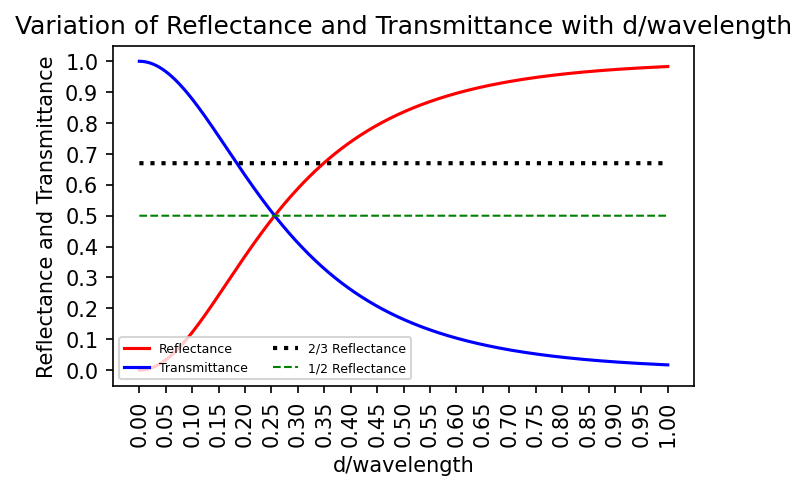

In [43]:
plt.figure(figsize=(5,3), dpi=150) 
#let n1=1 (air) n1=n3=1.5 (glass) and angle of incidence=45 degrees
n1=1.5
n2=1
n3=1.5
#let frequency of the light beam used be sodium D line: wavelength= 589.3 nm
# wavelength
wavelength=589.3*np.power(10.0,-9)
k=2*np.pi/wavelength

alpha=n1/np.sqrt(n1*n1-2*n2*n2)
beta=k*np.sqrt((n1*n1/2) -n2*n2)

# here d is the separation between the prisms forming the beam splitter
# d_by_w is d divided by wavelength of inspection beam
d_by_w=np.linspace(0,1,10000,endpoint=True)

# considering reflectance and transmittance of electric mode
R_TE=[]
T_TE=[]

#2/3 1/3 splitter:
r1=np.full((10000,),0.67, dtype='float32')

#1/2 1/2 splitter
r2=np.full((10000,),0.50, dtype='float32')

for i in range(0,len(d_by_w)):
  R_TE.append((np.power((1-np.power(alpha,2))*np.sinh(beta*wavelength*d_by_w[i]),2)+np.power(2*alpha*np.sinh(beta*wavelength*d_by_w[i]),2))/(np.power((1-np.power(alpha,2))*np.sinh(beta*wavelength*d_by_w[i]),2)+np.power(2*alpha*np.cosh(beta*wavelength*d_by_w[i]),2)))
  T_TE.append((np.power(2*alpha,2))/(np.power((1-np.power(alpha,2))*np.sinh(beta*wavelength*d_by_w[i]),2)+np.power(2*alpha*np.cosh(beta*wavelength*d_by_w[i]),2)))
plt.plot(d_by_w, R_TE,color='red', label='Reflectance')
plt.plot(d_by_w, T_TE, color='blue', label='Transmittance')
plt.plot(d_by_w,r1, color='black', linestyle='dotted', linewidth=2, label='2/3 Reflectance')
plt.plot(d_by_w,r2, color='green', linestyle='--', linewidth=1, label='1/2 Reflectance')

plt.title("Variation of Reflectance and Transmittance with d/wavelength")
plt.xlabel("d/wavelength")
plt.ylabel("Reflectance and Transmittance")
plt.xticks(np.linspace(0,1,21,endpoint=True),rotation=90)
plt.yticks(np.linspace(0,1,11,endpoint=True))
plt.legend(ncol=2, loc='lower left',fontsize=6)
plt.show()

### **Mode Converters**

The Mode Converters filter out spatial information except for a particular mode. A monochromatic paraxial laser light beam can be decoposed into Hermite-Gaussian (HG) modes (there are some other modes like Laguerre-Gaussian and Bessel Modes as well). These modes define how does the electric field magnitude varies spatially.

For a light beam propagating along $z$ axis:
$$ E^{HG}_{nm}=\frac{C^{HG}_{nm}}{w}e ^{\frac{-ik(x^{2}+y^{2})}{2R}} e ^{\frac{-(x^{2}+y^{2})}{w^{2}}} e ^{-i(n+m+1)\phi}H_{n}(\frac{x\sqrt(2)}{w})H_{m}(\frac{y\sqrt(2)}{w})$$

Here:
$$R(z)=\dfrac{z_{R}^{2}+z^{2}}{z}$$
$$ \dfrac{kw^{2}(z)}{2}=\dfrac{z_{R}^{2}+z^{2}}{z_{R}} $$
$$\phi(z)=\arctan (\frac{z}{z_{R}})$$ 

The $\psi$ that we discussed in preceding sections is given by $E^{HG}_{nm}$.

The parameter $z_{R}$ is the Rayleigh Range of the mode and $C^{HG}_{nm}$ is a constant: $C^{HG}_{nm}=( \dfrac{2}{\pi n! m!})^{1/2}2^{-(n+m)/2}$

The mode converter rephases the terms in decomposition of $E$ to change the overall mode of the beam. We make a mode converter using two identical cylindrical lenses separated by a distance $2d$. The phase difference $\theta$ [3] introduced by the MC is given by:
$$ \theta = 2[\arctan(\sqrt{\dfrac{f+d}{f-d}})-\arctan(\sqrt{\dfrac{f-d}{f+d}})] $$

For $\theta = \pi/2$, we get $d=f/\sqrt{2}$ and for $\theta = \pi$, we get $d=f$.

The three mode converters MC A, MC B, and MC C is shown in Figure 3.4 below:

<img src="https://drive.google.com/uc?export=view&id=1iq1A7fkVkIDpfAA9nrvcL81hdjtF5wmi" width="150">

**Figure 3.4 The three MC used in the experiment, MC A, MC B, MC C (empty space) respectively**

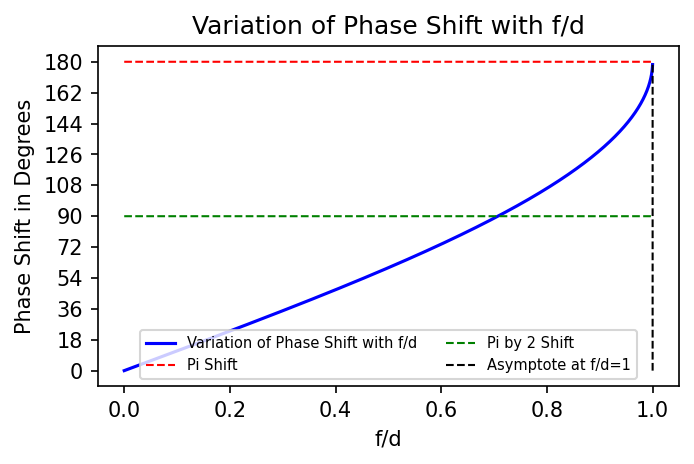

In [44]:
plt.figure(figsize=(5,3), dpi=150) 
d_by_f= np.linspace(0,1,10000,endpoint=False)
pi_shift=np.full((10000,),180,dtype='int32')
pi_bytwo_shift=np.full((10000,),90,dtype='int32')
x_asymp=np.full((10000,),1,dtype='int32')
theta=[]

for i in range(0,len(d_by_f)):
  theta.append(2*180*(np.arctan(np.sqrt((1+d_by_f[i])/(1-d_by_f[i])))-np.arctan(np.sqrt((1-d_by_f[i])/(1+d_by_f[i]))))/np.pi)
plt.plot(d_by_f,theta, label="Variation of Phase Shift with f/d",color="blue")
plt.plot(d_by_f,pi_shift, label="Pi Shift",color="red", linestyle='--', linewidth=1)
plt.plot(d_by_f,pi_bytwo_shift, label="Pi by 2 Shift",color="green",linestyle='--', linewidth=1)
plt.plot(x_asymp,theta, label="Asymptote at f/d=1",color="black",linestyle='--', linewidth=1)

plt.title("Variation of Phase Shift with f/d")
plt.legend(fontsize='7',loc='best', ncol=2)
plt.xlabel("f/d")
plt.ylabel("Phase Shift in Degrees")
plt.yticks([0,18,36,54,72,90,108,126,144,162,180])
plt.show()

### **Mode beam splitter**
The MBS are made of a modified Mach-Zehnder Interferometer with an extra mirror in one arm and a half-wave plate in the other arm and in the output port.

<img src="https://drive.google.com/uc?export=view&id=1WCDZsRo3EMxM1Pp0i1t6tCka2oFYcYQv" width="450">

**Figure 3.5 The Mode Beam Splitter, based on Mach-Zehnder Interferometer**

On each reflection the handedness of the spatial modes is inverted and phase difference between $x$ and $y$ polarization components is shifted by $\pi$. We have assumed two inputs (for symmetry in mathematical consideration) in this setup for MBS, the first one being our beam of interest  $E_{1}^{in}=[A_{00}\psi_{10} (\textbf{r})+A_{01}\psi_{01} (\textbf{r})]\textbf{e}_{x}+[A_{10}\psi_{10} (\textbf{r})+A_{11}\psi_{01} (\textbf{r})]\textbf{e}_{y}$ and the second one being $E_{2}^{in}=0$.

The HG mode $\psi_{10}$ changes sign upon reflection, whereas $\psi_{01}$ doesn't changes sign.


### Polarization Converter
Analogous to Mode converters, the Polarization converters select one of the bases and reject the other bases for the polarization DoF of the light beam. The polarization converters are based on the concept of retarders. Retarders introduce a phase lag between the two constituent coherant polarization states. 

To construct PC A, we use a Quarter Wave Plate (QWP) with its fast axis tilted by $\pi /4$ with respect to horizontal direction. QWP introduces a relative phase shift of $\pi /2$ between the $o-$ and $e-$ components of the wave. This means that a radial beam will be elucidated into left and right eliptic polarizations. When the linear light is at $45^{o}$ to either principal axis, the emerging waves have equal $o-$ and $e-$ components amplitudes. 

<img src="https://drive.google.com/uc?export=view&id=1vk8fa5qvCVufwu56U2GecAUW03t65SeF" width="450">

**Figure 3.6 Quarter Wave Plate Retarder**[4]

For PC B, we use a Half Wave Plate (HWP) with its fast axis tilted by $\pi /8$ with respect to horizontal direction. HWP introduces a relative phase difference of $\pi$ between the $o-$ and $e-$ components of the wave. Incident linear polarized light at an angle $\theta$ with fast axis rotated through $2\theta$ about the fast axis. So, to obtain diagonally polarized light beams, we want the beam to oscillate at $45^{o}$ with the $x$ and $y$ axis, therefore the fast axis is tilted at $22.5^{o}$ degrees with horizontal axis.

<img src="https://drive.google.com/uc?export=view&id=1sOcNgBM-9DozqADrMvUs3jDTUHePrvoe" width="450">

**Figure 3.7 Half Plate Wave Retarder**[4]

We want linear polarization states only for the third mode so PC C, like MC C, is empty space.


In [60]:
M1 = Mueller("quarter_waveplate")
M1.quarter_waveplate(azimuth=np.pi/4)
M1.M=np.matrix.round(M1.M, decimals=2)
print(M1)

M2 = Mueller("half_waveplate")
M2.half_waveplate(azimuth=np.pi/8)
M2.M=np.matrix.round(M2.M, decimals=2)
print(M2)

quarter_waveplate @ 45.00 deg = 
[+1.000 +0.000 +0.000 +0.000 ]   
[+0.000 +0.000 +0.000 -1.000 ]   
[+0.000 +0.000 +1.000 +0.000 ]   
[+0.000 +1.000 -0.000 +0.000 ]   

half_waveplate @ 22.50 deg = 
[+1.000 +0.000 +0.000 +0.000 ]   
[+0.000 +0.000 +1.000 +0.000 ]   
[+0.000 +1.000 -0.000 +0.000 ]   
[+0.000 +0.000 +0.000 -1.000 ]   



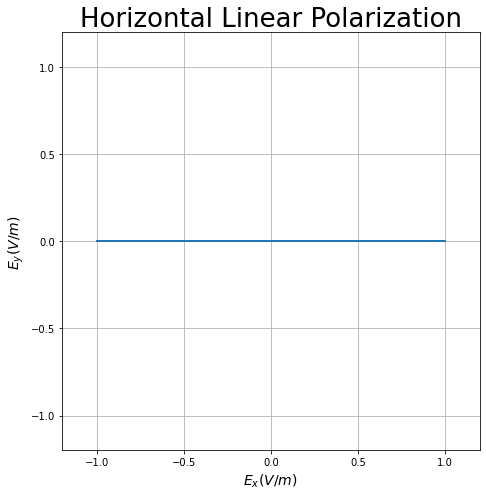

In [68]:
S0=Stokes("Horizontal Linear Polarization")
S0.linear_light(azimuth=0*degrees)
S0.M=np.matrix.round(S0.M, decimals=2)
axis, fig = S0.draw_ellipse(draw_arrow=True, figsize=(7,7))

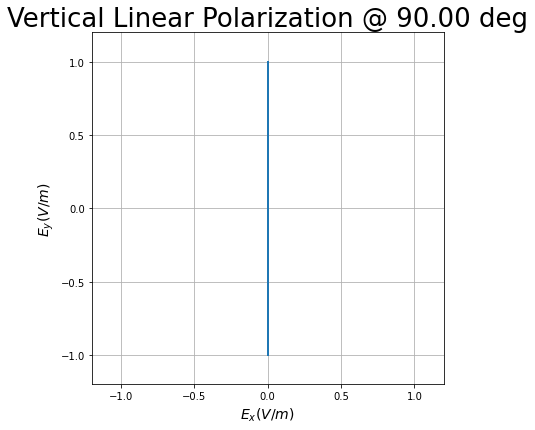

In [63]:
S1=Stokes("Vertical Linear Polarization")
S1.linear_light(azimuth=90*degrees)
S1.M=np.matrix.round(S1.M, decimals=2)
axis, fig = S1.draw_ellipse(draw_arrow=True, figsize=(7,7))

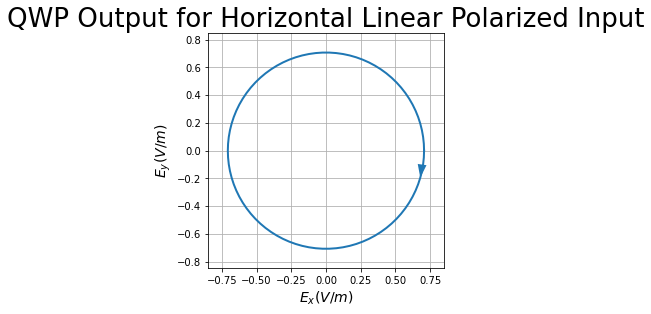

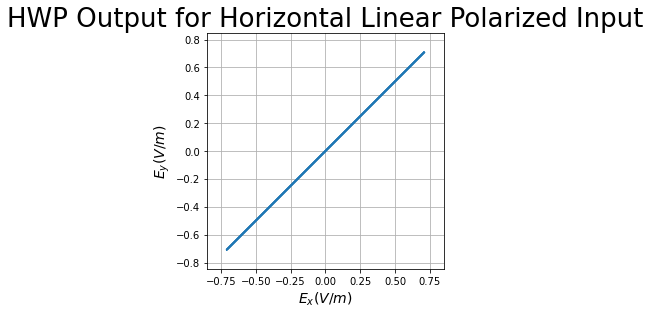

In [65]:
linear_p_h_state=np.reshape(S0.M, (4,))
QWP=np.reshape(M1.M, (4,4))
HWP=np.reshape(M2.M, (4,4))

qwp_output=np.matmul(QWP, linear_p_h_state)
qwp_output=tuple(qwp_output.tolist())
S2=Stokes("QWP Output for Horizontal Linear Polarized Input")
S2.from_components(qwp_output)
axis, fig = S2.draw_ellipse(draw_arrow=True, figsize=(7,7))

hwp_output=np.matmul(HWP, linear_p_h_state)
hwp_output=tuple(hwp_output.tolist())
S3=Stokes("HWP Output for Horizontal Linear Polarized Input")
S3.from_components(hwp_output)
axis, fig = S3.draw_ellipse(draw_arrow=True, figsize=(7,7))

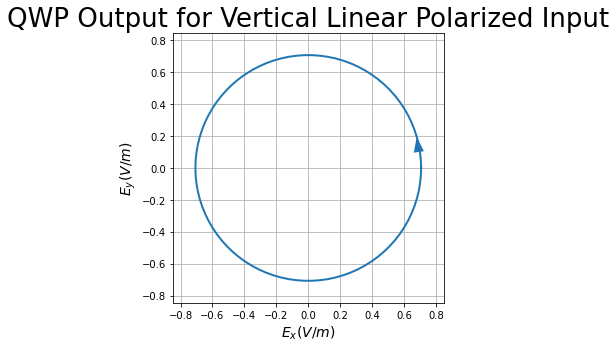

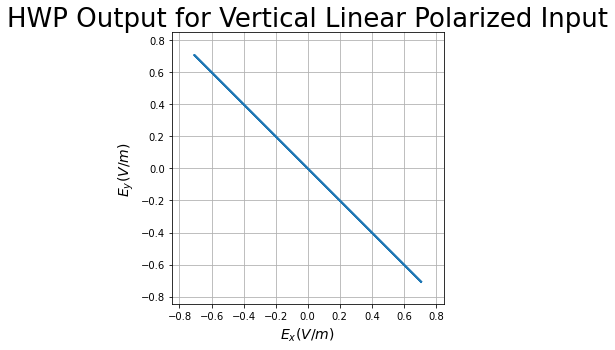

In [67]:
linear_p_v_state=np.reshape(S1.M, (4,))
QWP=np.reshape(M1.M, (4,4))
HWP=np.reshape(M2.M, (4,4))

qwp_output=np.matmul(QWP, linear_p_v_state)
qwp_output=tuple(qwp_output.tolist())
S2=Stokes("QWP Output for Vertical Linear Polarized Input")
S2.from_components(qwp_output)
axis, fig = S2.draw_ellipse(draw_arrow=True, figsize=(7,7))

hwp_output=np.matmul(HWP, linear_p_v_state)
hwp_output=tuple(hwp_output.tolist())
S3=Stokes("HWP Output for Vertical Linear Polarized Input")
S3.from_components(hwp_output)
axis, fig = S3.draw_ellipse(draw_arrow=True, figsize=(7,7))

### Polarizing Beam Splitters
Just like MBS, Polarizing beam splitter split their inputs into the two orthogonal polarization states. Most common type is a Polarizing cube, that works like a beam splitter cube, splitting the incident beams into two part, but orthonal polarizations. To do so, it uses Brewster's Law. The polaring cube is made of of multiple sheets of dielectric material. The reflected beams from the multiple sheets collectively form one of the two emergent beams and similarly for the refracted beams.

The figure adapted from [4] shows a rough sketch of the device. The input in the figure is an unpolarized light so it gets split into linearly polarized lights (this happens in PBS C). In our case, the input beam is a mixture of two orthonal polarizations of three bases, so the emergent beams will be the components of those bases, not necessarily the linearly polarized beams.

<img src="https://drive.google.com/uc?export=view&id=1m711Re4rtzDB1_pYM0vioMoTsWw-AGoL" width="450">

**Figure 3.8 Polarizing Beam Splitter, with input and output example for PC C**[4]


https://drive.google.com/file/d/1m711Re4rtzDB1_pYM0vioMoTsWw-AGoL/view?usp=sharing


References:

1. Arvidsson-Shukur, D.R.M., Yunger Halpern, N., Lepage, H.V. et al. Quantum advantage in postselected metrology. Nat Commun 11, 3775 (2020). https://doi.org/10.1038/s41467-020-17559-w
2. Jia-Ren Chang Chien, Chi-Chung Liu, Chien-Jang Wu, Pei Yu Wu, and Chang Ching Li, "Design Analysis of a Beam Splitter Based on the Frustrated Total Internal Reflection," Progress In Electromagnetics Research, Vol. 124, 71-83, 2012. doi:10.2528/PIER11110904 http://www.jpier.org/PIER/pier.php?paper=11110904
3. M.W. Beijersbergen, L. Allen, H.E.L.O. van der Veen, J.P. Woerdman, Astigmatic laser mode converters and transfer of orbital angular momentum, Optics Communications, Volume 96, Issues 1–3, 1993, Pages 123-132, ISSN 0030-4018, 
https://doi.org/10.1016/0030-4018(93)90535-D.
4. Optics, 5th Edition, Eugene Hecht, Pearson Education, 2017. https://www.pearson.com/us/higher-education/program/Hecht-Optics-5th-Edition/PGM45350.html